In [117]:
import requests
import json
from bs4 import BeautifulSoup
import lxml
import pandas as pd
from highlight_text import fig_text
from mplsoccer import VerticalPitch,Pitch
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
import seaborn as sns
from adjustText import adjust_text
from urllib.request import urlopen
import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import Pitch, add_image
plt.style.use('default')
import matplotlib.font_manager as fm
import numpy as np

In [118]:
df = pd.read_csv(r"D:\Downloads\Downloads\Player Goal and Shot Creation 2021-2022 Big 5 European Leagues  - Sheet1.csv")
df = df.iloc[1: , :]

In [119]:
df.rename(columns=

    {"SCA":"Shot creation actions", "SCA.1":"Shot creation actions / 90",   "SCA Types":"Live pass --> Shot",   "SCA Types.1":"Dead pass --> Shot", "SCA Types.2":"Dribble --> Shot",

    "SCA Types.3":"Shot --> Another shot",  "SCA Types.4":"Foul --> Shot",  "SCA Types.5":"Defensive action --> Shot",  "GCA":"Goal creation actions",  "GCA.1":"Goal creation actions / 90",

    "GCA Types":"Live pass --> Goal",   "GCA Types.1":"Dead pass --> Goal", "GCA Types.2":"Dribble --> Goal",   "GCA Types.3":"Shot --> Goal scoring shot", "GCA Types.4":"Foul --> Goal", 
    
     "GCA Types.5":"Defensive action --> Goal"},inplace=True)

In [120]:
df.fillna(0,inplace=True)
df.head()

,Player,Pos,Squad,90s,Shot creation actions,Shot creation actions / 90,Live pass --> Shot,Dead pass --> Shot,Dribble --> Shot,Shot --> Another shot,Foul --> Shot,Defensive action --> Shot,Goal creation actions,Goal creation actions / 90,Live pass --> Goal,Dead pass --> Goal,Dribble --> Goal,Shot --> Goal scoring shot,Foul --> Goal,Defensive action --> Goal
1,Max Aarons,DF,Norwich City,32,38,1.19,27,2,3,4,2,0,5,0.16,5,0,0,0,0,0
2,Yunis Abdelhamid,DF,Reims,33.1,21,0.63,14,0,3,1,0,3,1,0.03,0,0,1,0,0,0
3,Salis Abdul Samed,MF,Clermont Foot,27.4,40,1.46,30,0,0,4,4,2,1,0.04,1,0,0,0,0,0
4,Laurent Abergel,MF,Lorient,32.8,66,2.01,49,2,1,1,7,6,5,0.15,4,0,0,0,1,0
5,Charles Abi,FW,Saint-Étienne,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
df[['90s', 'Shot creation actions',
       'Shot creation actions / 90', 'Live pass --> Shot',
       'Dead pass --> Shot', 'Dribble --> Shot', 'Shot --> Another shot',
       'Foul --> Shot', 'Defensive action --> Shot', 'Goal creation actions',
       'Goal creation actions / 90', 'Live pass --> Goal',
       'Dead pass --> Goal', 'Dribble --> Goal', 'Shot --> Goal scoring shot',
       'Foul --> Goal', 'Defensive action --> Goal']] = df[['90s', 'Shot creation actions',
       'Shot creation actions / 90', 'Live pass --> Shot',
       'Dead pass --> Shot', 'Dribble --> Shot', 'Shot --> Another shot',
       'Foul --> Shot', 'Defensive action --> Shot', 'Goal creation actions',
       'Goal creation actions / 90', 'Live pass --> Goal',
       'Dead pass --> Goal', 'Dribble --> Goal', 'Shot --> Goal scoring shot',
       'Foul --> Goal', 'Defensive action --> Goal']].apply(pd.to_numeric)


In [122]:
filter = ((df['90s'] > 20) & (df['Shot creation actions'] != 0) & (df['Goal creation actions'] != 0))
FilteredDf = df[filter]

AttackFinal = pd.DataFrame()

AttackFinal['Player'] = FilteredDf['Player']
AttackFinal['Squad'] = FilteredDf['Squad']
AttackFinal['Shot creation actions'] = FilteredDf['Shot creation actions']
AttackFinal['Goal creation actions'] = FilteredDf['Goal creation actions']

x_mean = np.mean(AttackFinal['Shot creation actions'])
y_mean = np.mean(AttackFinal['Goal creation actions'])

MUFilter = (AttackFinal['Squad'] == 'Manchester Utd')
MUPlayers = AttackFinal[MUFilter]

ArsenalFilter = (AttackFinal['Squad'] == 'Arsenal')
ArsenalPlayers = AttackFinal[ArsenalFilter]

AllPlayersFilter = ((AttackFinal['Squad'] != 'Manchester Utd') & \
        (AttackFinal['Squad'] != 'Arsenal'))
AllPlayers = AttackFinal[AllPlayersFilter]

MUPlayers.reset_index(inplace=True,drop=True)
ArsenalPlayers.reset_index(inplace=True,drop=True)
AllPlayers.reset_index(inplace=True,drop=True)

from matplotlib import transforms


def rainbow_text(x, y, strings, colors, orientation='horizontal',
                 ax=None, **kwargs):
    """
    Take a list of *strings* and *colors* and place them next to each
    other, with text strings[i] being shown in colors[i].

    Parameters
    ----------
    x, y : float
        Text position in data coordinates.
    strings : list of str
        The strings to draw.
    colors : list of color
        The colors to use.
    orientation : {'horizontal', 'vertical'}
    ax : Axes, optional
        The Axes to draw into. If None, the current axes will be used.
    **kwargs
        All other keyword arguments are passed to plt.text(), so you can
        set the font size, family, etc.
    """
    if ax is None:
        ax = plt.gca()
    t = ax.transData
    canvas = ax.figure.canvas

    assert orientation in ['horizontal', 'vertical']
    if orientation == 'vertical':
        kwargs.update(rotation=90, verticalalignment='center', horizontalalignment='center')

    for s, c in zip(strings, colors):
        text = ax.text(x, y, s + " ", color=c, transform=t, **kwargs)

        # Need to draw to update the text position.
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()
        if orientation == 'horizontal':
            t = transforms.offset_copy(
                text.get_transform(), x=ex.width, units='dots')
        else:
            t = transforms.offset_copy(
                text.get_transform(), y=ex.height, units='dots')

# Establishing lists for plotting in matplotlib

x1 = list(MUPlayers['Shot creation actions'])
x2 = list(ArsenalPlayers['Shot creation actions'])
x3 = list(AllPlayers['Shot creation actions'])
y1 = list(MUPlayers['Goal creation actions'])
y2 = list(ArsenalPlayers['Goal creation actions'])
y3 = list(AllPlayers['Goal creation actions'])
n1 = list(MUPlayers['Player'])
n2 = list(ArsenalPlayers['Player'])
n3 = list(AllPlayers['Player'])

# Creating empty plot in desired 'fivethirtyeight' style with gridlines and desired backround colours and sizes, as well
# as aesthetic settings


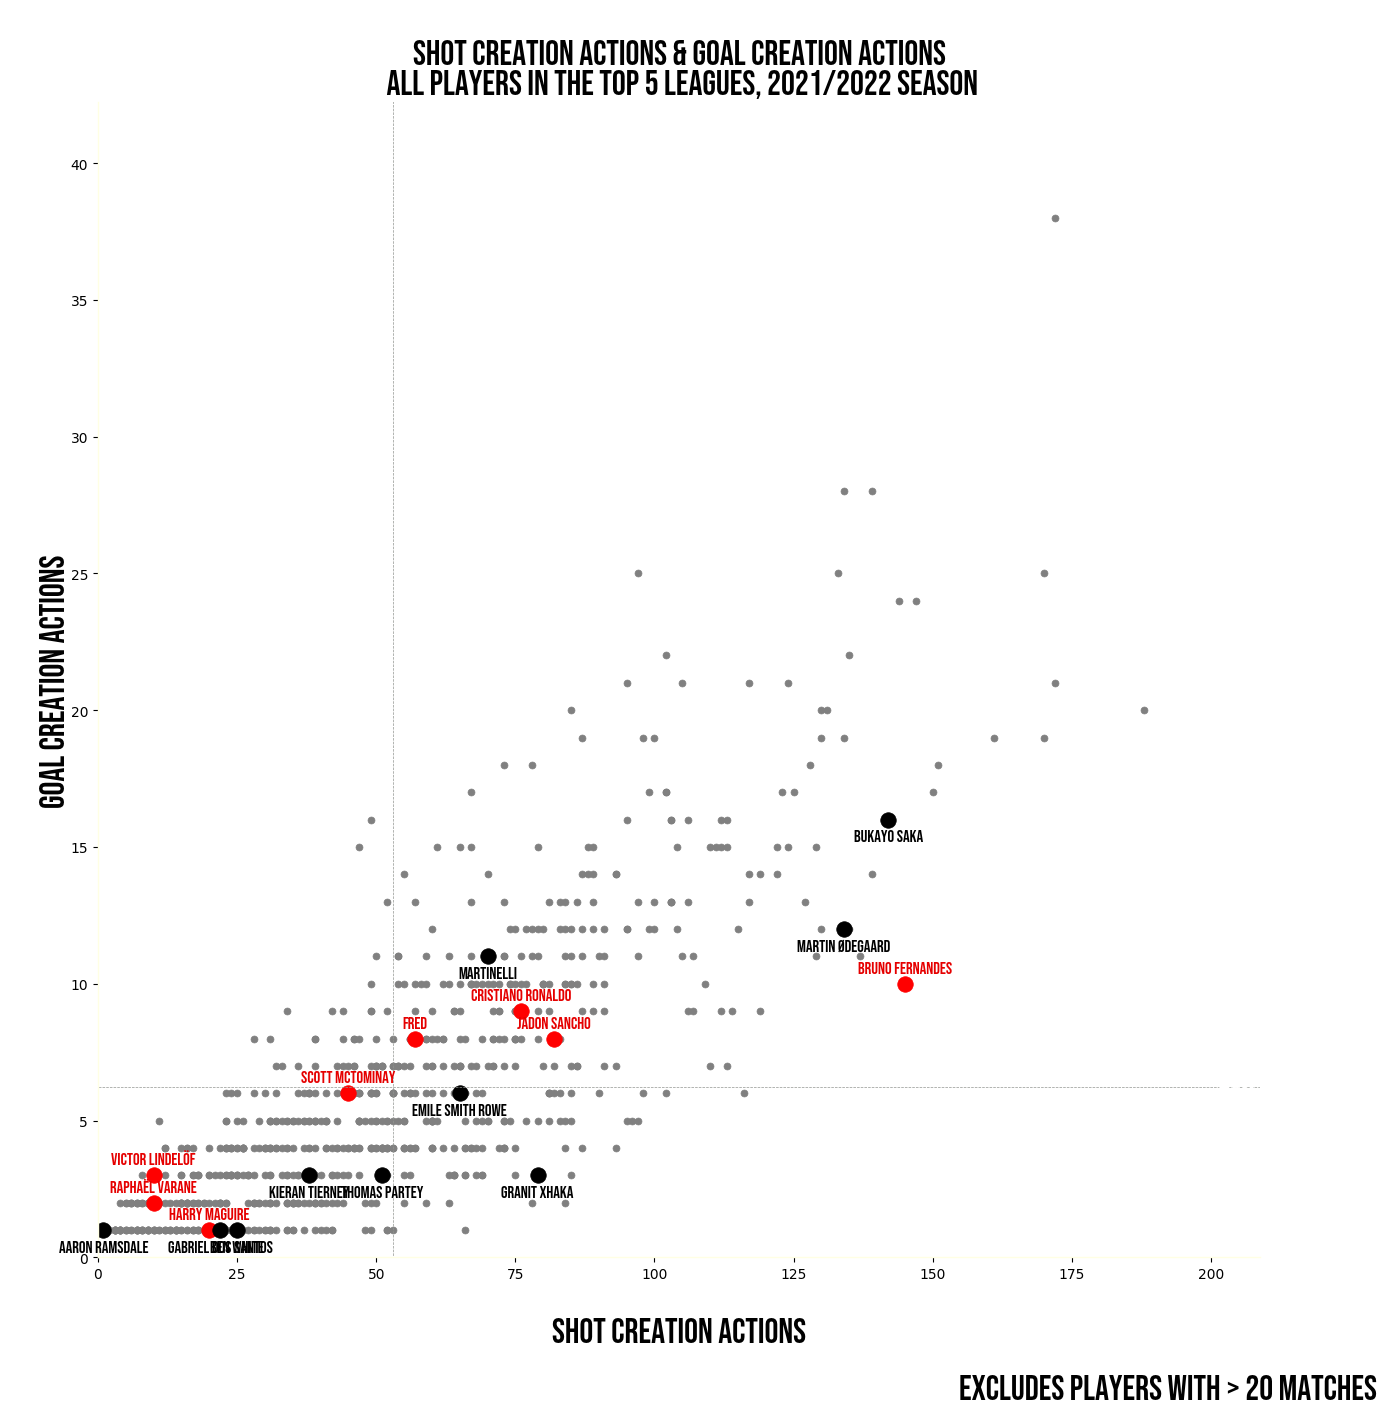

In [123]:
import matplotlib.pyplot as mpl
background = 'white'
text_color = 'white'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['axes.labelcolor']='black'
mpl.rcParams['text.color']=text_color
mpl.rcParams['legend.fontsize'] = 15

path = r"D:\Downloads\Downloads\1d8761b0-9410-11e9-ba67-ebab80fd2244.otf"
fontprop = fm.FontProperties(fname=path, size=60, weight='bold', style='normal', stretch='normal')
fontprop2 = fm.FontProperties(fname=path, size=12.5*2, weight='bold', style='normal', stretch='normal')
fontprop3 = fm.FontProperties(fname=path, size=6.5*3.5, weight='bold', style='normal', stretch='normal')

fig,ax= plt.subplots(figsize=(15,15))
fig.patch.set_color(background)
plt.style.use('fivethirtyeight')
fig.patch.set_facecolor(background)
ax.set_facecolor('white')
ax.spines['bottom'].set_color('xkcd:off white')
ax.spines['top'].set_color('xkcd:off white')
ax.spines['left'].set_color('xkcd:off white')
ax.spines['right'].set_color('xkcd:off white')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.tick_params(axis='x', colors='xkcd:black')
ax.tick_params(axis='y', colors='xkcd:black')

plt.text(1.075,0.4,"\n", \
        horizontalalignment='right', verticalalignment='top', color='xkcd:off white', size='18', transform=ax.transAxes)

plt.text(1.1, -0.075, '\nExcludes players with > 20 Matches', \
         horizontalalignment='right', verticalalignment='top', color='xkcd:black', \
             style='italic', transform=ax.transAxes,fontproperties= fontprop2)

# Setting necessary limits

xlimval = max(max(x1), max(x2), max(x3))*1.01
ylimval = max(max(y1), max(y2), max(y3))*1.01
plt.xlim(0, xlimval*1.1)
plt.ylim(0, ylimval*1.1)

# labelling chart and axes
ax.set_xlabel('\nShot creation actions\n', color='black',fontproperties= fontprop2)
ax.set_ylabel('\nGoal creation actions', color='xkcd:black', fontproperties= fontprop2)
ax.set_title("\nShot creation actions & Goal creation actions\n All players in the top 5 leagues, 2021/2022 season", color='xkcd:black',fontproperties= fontprop2)


# Creating and labelling average lines
plt.axhline(y=y_mean, xmin =-100, xmax=100, color='xkcd:grey', linestyle='--', linewidth=0.5)
plt.axvline(x=x_mean, ymin=-100,ymax=100, color='xkcd:grey', linestyle = '--', linewidth=0.5, zorder=0.2)
plt.text(x_mean/xlimval*1.04,0.995,'Avg', \
         horizontalalignment='right', verticalalignment='top', color='xkcd:white', transform=ax.transAxes,fontproperties= fontprop3)
plt.text(0.995,y_mean/ylimval,'Avg', \
         horizontalalignment='right', verticalalignment='top', color='xkcd:white', transform=ax.transAxes,fontproperties= fontprop3)

# Adding plot points

for i in range(len(MUPlayers)):
    plt.scatter(MUPlayers['Shot creation actions'][i],MUPlayers['Goal creation actions'][i],color = 'red',s=125)

for i in range(len(ArsenalPlayers)):
    plt.scatter(ArsenalPlayers['Shot creation actions'][i],ArsenalPlayers['Goal creation actions'][i],color = 'black',s=125)

for i in range(len(AllPlayers)):
    plt.scatter(AllPlayers['Shot creation actions'][i],AllPlayers['Goal creation actions'][i],color = 'grey',s=25,zorder=-1)

for i in n1:
        plt.annotate(i, (x1[n1.index(i)], y1[n1.index(i)]+0.4), color='xkcd:red', \
        horizontalalignment='center', fontsize=12, zorder=100,fontproperties= fontprop3)   
for i in n2:
        plt.annotate(i, (x2[n2.index(i)], y2[n2.index(i)]-0.8), color='xkcd:black', \
        horizontalalignment='center', fontsize=12, zorder=100,fontproperties= fontprop3)

plt.savefig(r"C:\Users\Administrator\Desktop\DataVizMaterial\trial.png",dpi=300,bbox_inches='tight')
plt.show()